# Analysez et modélisez des séries temporelles

## 1. TP : représentez des séries temporelles

Fixer le dossier de travail à l'emplacement du présent notebook

In [1]:
import os

On importe la série temporelle sunspot : nombre annuel de tâches solaires de 1790 à 1970. Le fichier CSV se trouve dans le dossier Data :

<AxesSubplot:xlabel='t'>

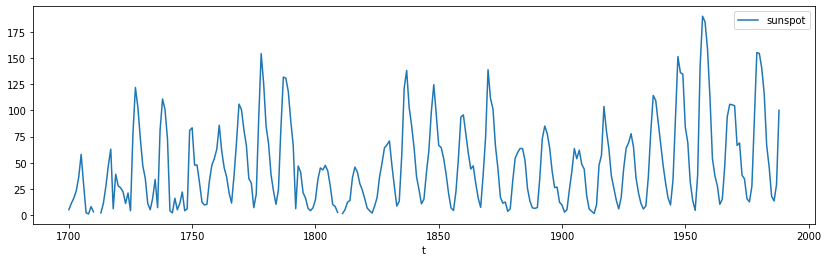

In [2]:
import pandas as pd

sunspot_year = pd.read_csv("../Data/sunspot.year.csv", index_col="t")
sunspot_year.plot(y="sunspot", figsize=(14,4))

Bruit blanc gaussien de loi $N(0,3^{2})$.
Pour les simulations effectuées dans ce document, on fixe arbitrairement la racine (seed) à 1789.

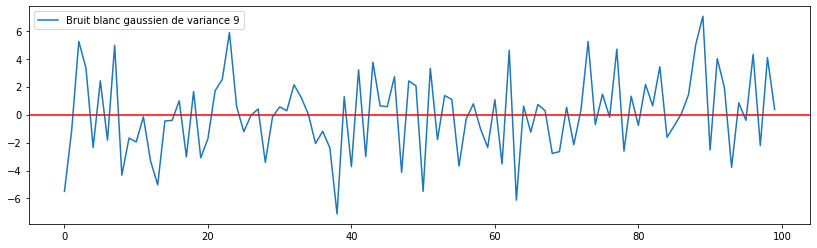

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1789)
norm = pd.DataFrame({'Bruit blanc gaussien de variance 9': np.random.normal(scale=3, size=100), 't': range(100)})
norm.set_index('t')
norm.plot(y='Bruit blanc gaussien de variance 9', figsize=(14,4))
plt.axhline(y=0, color='r', linestyle='-')

Série uspop : population des Etats-Unis, en millions, de 1790 à 1990 (Pas de temps décennal)

<AxesSubplot:xlabel='t'>

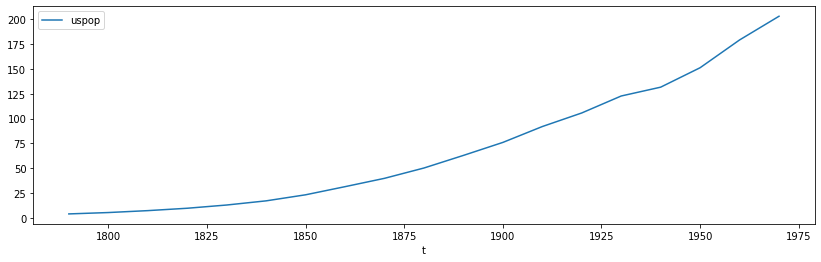

In [4]:
uspop = pd.read_csv("../Data/uspop.csv", index_col="t")

uspop.plot(y="uspop", figsize=(14,4))

Série airpass : nombre mensuel de passagers aériens, en milliers, de janvier 1949 à décembre 1960. 
Série brute :

<AxesSubplot:xlabel='t'>

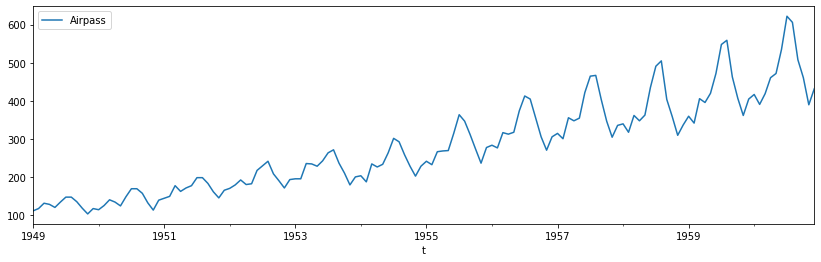

In [5]:
AirPassengers = pd.read_csv("../Data/AirPassengers.csv", parse_dates=[0], dayfirst=True, index_col="t")
AirPassengers.plot(y="Airpass", figsize=(14,4))

Logarithme de la série airpass

<AxesSubplot:xlabel='t'>

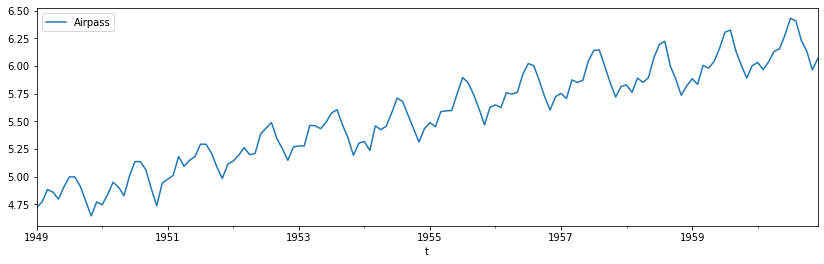

In [6]:
np.log(AirPassengers).plot(y="Airpass", figsize=(14,4))

Série beer : production mensuelle de bière en Australie, en mégalitres, de janvier 1956 à aout 1995

<AxesSubplot:xlabel='t'>

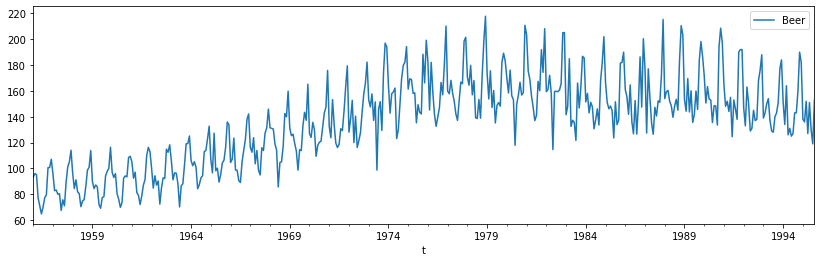

In [7]:
beer = pd.read_csv("../Data/beer.csv", header=None, names=["t", "Beer"], parse_dates=[0], dayfirst=True, index_col="t")
beer.plot(y="Beer", figsize=(14,4))

Série lynx : nombre annuel de lynx capturés au Canada, de 1821 à 1934

<AxesSubplot:xlabel='t'>

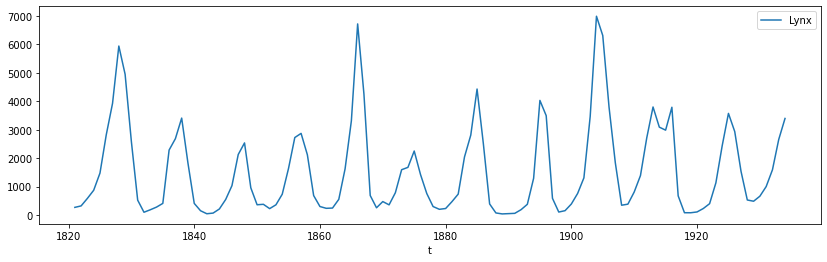

In [8]:
lynx = pd.read_csv("../Data/lynx.csv", index_col="t")
lynx.plot(y="Lynx", figsize=(14,4))

Sauf mention contraire, on travaillera dans la suite du cours sur la série temporelle airpass. 

On la stockera sous la variable x, et son logarithme sous la variable y:

In [9]:
x = AirPassengers
y = np.log(AirPassengers)

# Partie 2  
  
  
### A/ Comprenez les variations Saisonnières  
Les composantes de la séries temporelles :
 - La tendance $\normalsize T_{t}$:  
        Traduit le niveau moyen de la série temporelle.
 - Une saisonnalité  $\normalsize S_{t}$:  
        L'ensemble des periodicités de la série temporelle, qui est centré & de moyenne nulle.
 - Un résidu $\normalsize E_{t}$:  
        La part inéxpliquée...
 - Cycle :  
        Equivalent à une périodicité de période plus longue.
  
  
Les deux types de modèles de séries temporelles :  
 - Additif : $X_{t} = T_{t} + S_{t} + e_{t}$  
 - Multiplicatif : $X_{t} = T_{t} ( 1 + S_{t} )( 1 + E_{t} )$  

La fonction Log permet de passer d'un modèle Multiplicatif à un modèle Additif.  
  
L'étude la différence entre minimum et maximum de chaque période permet de savoir si une série temporelle est une série qui correspond au modèle Additif ou au modèle Multiplicatif.  
Si L'écart entre le minimum et le maximum de chaque période croit ou décroit, la série temporelle est une série qui suit le modèle Multiplicatif. Si non, la série suit le modèle additif.



## 2. TP : Désaisonnalisez à l'aide de la régression linéaire  
  
  
### Désaisonnalizer une série temporelle revient à supprimer la variation vis à vis de de la saison.  

Dans notre cas actuelle, celui du nombre de passage de l'avion, cela revient à supprimer la dépendance suivant le mois.  
N'oublions pas d'utiliser la fonction logaritme pour transformer cette série en série additif
  
  
#### Mise en équation  

Exprimons la série comme la somme d'une fonction linéaire et d'un coefficient qui dépend du mois :  
 - $\forall t \in \{1,...,144\} : Y_{t}  = a + bt + \sum_{i=1}^{12}  c_{i} 1_{mois=i}$  
 - 1 représente la somme des fonctions indicatrices : $\sum_{i=1}^{12}  1_{mois=i} \normalsize (t) = 1$  
  
  
Cela se rapporte donc à un problème de colinéarité.  
Si l'on connait $a$, $b$ et les $c_{i}$, on pourra se rapporter à la résolution d'un régression linéaire classique.  
Pour cela, nous allons retrancher à $Y_{t}$ l'approximation du coefficient qui dépend du mois $ \sum_{i=1}^{12}  \hat{c}_{i} 1_{mois=i}$  :

$\forall t \in \{1,...,144\} : Y_{t}^{CVS}  = Y_{t} - \sum_{i=1}^{12}  \hat{c}_{i} 1_{mois=i}$

On souhaite désaisonnaliser la série temporelle airpass à l'aide de la régression linéaire.
On créé à cet effet les bases tendancielle et saisonnière :

In [10]:
t = range(1, 145)

for i in range(12):
    su = np.repeat(0, repeats=12)
    su[i] = 1
    s = np.tile(su, 144 // len(su) + 1)[:144]
    vars()['s' + str(i+1)] = s

On effectue la régression linéaire (le modèle est transformé, comme vu en cours, afin de pallier le problème de colinéarité) sur la série Yt :

In [11]:
from sklearn import linear_model

reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(np.array([t, s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12]).transpose(), y)

LinearRegression(fit_intercept=False)

Les différents coefficients sont contenues dans reg.coef_ :

In [12]:
print(reg.coef_)

[[0.0100688  4.72678037 4.70472554 4.83495267 4.80368381 4.80131117
  4.92345737 5.0273997  5.01810486 4.87347026 4.73531202 4.59159431
  4.7054593 ]]


On revient aux coefficients initiaux :

In [13]:
a = np.mean(reg.coef_[0][1:13])
b = reg.coef_[0][0]
c = reg.coef_[0][1:13] - a

In [14]:
y_cvs = y['Airpass'] - (c[0]*s1+c[1]*s2+c[2]*s3+c[3]*s4+c[4]*s5+c[5]*s6+c[6]*s7+c[7]*s8+c[8]*s9+
                        c[9]*s10+c[10]*s11+c[11]*s12)
x_cvs = np.exp(y_cvs)

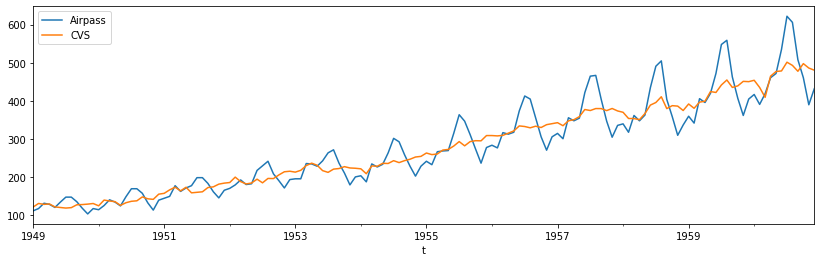

In [15]:
x_cvs = x_cvs.rename("CVS")
x.plot(figsize=(14,4))
x_cvs.plot(legend = True)
plt.show()

### Désaisonnalisez à l'aide des moyennes mobiles  

  
Le but de désaisonnaliser une moyenne mobile est de garder une tendance T linéaire (ou quadratique) et une périodicité nulle.

Notons la moyenne mobile M.
  
  Nous pouvons représenter les moyennes mobiles de la manière suivante : 
   - $\forall t \in \{m_{1},m_{1}-1...0..m_{2}-1,m_{2}\} : Y_{t}  =  \sum_{i=1}^{m1+m2}  O_{i-m1} X_{i-m2}$  
  
  
On appelle **moyenne mobile normalisée** une moyenne mobile tel que : 
  - $\forall t \in \{1,...,n\} : \sum_{i=1}^{n}  O_{i} = 1 $  

On appelle **moyenne mobile centrée** si elle a autant de terme à sa droite qu'à sa gauche : 
  - $m = m1 = m2$  

On appelle **moyenne mobile symétrique** (ou simple) si : 
  - $\forall t \in \{1,...,m\} : O_{t} = O_{-t} $  
  
Les moyennes mobiles possèdent la propriété de commutativité.
  
#### Exemple de la moyenne mobile simple :
 - $\forall t \in \{m,m-1...0..m-1,m\} : MX_{t}  =  \frac{1}{2m}(\sum_{i=0}^{2m}X_{i - m})$
  
On appelle **série invariante par moyenne mobile** si  : 
  - $\forall t \in \{1,...,m\} : MX_{t} = X_{t} $  
  
On appelle **série absorbée par moyenne mobile** si  : 
  - $\forall t \in \{1,...,m\} : M{n}X_{t} -> 0 \:si \: n -> +\infty $  


  
Appliquer la moyenne sur une série (prenons le cas du modèle additif) revient à l'appliquer sur chaque composante :
 - Hypothèse : 
   - $MT_{t}=T_{t}$
   - $MS_{t}=0$
   - $ME_{t}$ très faible
 - $ MX_{t} = MT_{t} + MS_{t} + ME_{t}$   
  
  
Le pouvoir de la dispersion d'une moyenne mobile est : 
 - $\frac{Var(MEt)}{Var(Et)}= \sum_{i=1}^{n}  O_{i}$

## 3. Découvrez des algorithmes de traitement des moyennes mobiles

On utilise la fonction "seasonal_decompose" du package statsmodels :

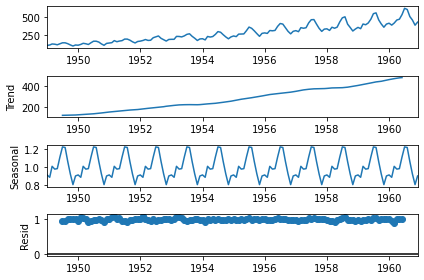

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomp_x = seasonal_decompose(x,  model='multiplicative')
decomp_x.plot()
plt.show()

## 4. TP : Prévoyez une série à l’aide des méthodes de lissage exponentiel

Si on souhaite prévoir la série airpass à l'aide du lissage exponentiel simple, on peut utiliser les commandes suivantes :

/Users/anislours/Desktop/workspace/venv/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


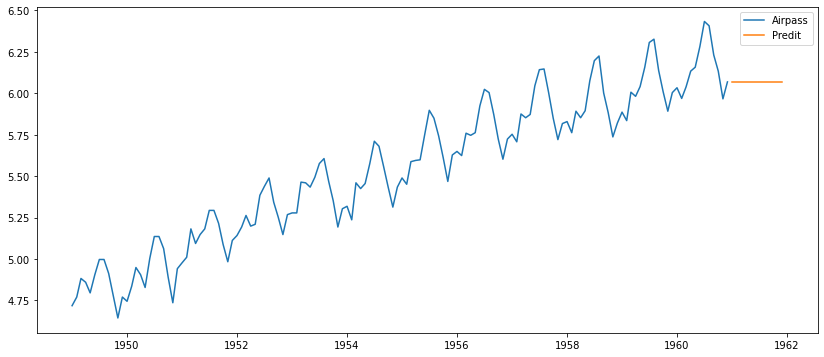

In [17]:
from statsmodels.tsa.api import ExponentialSmoothing

les = ExponentialSmoothing(np.asarray(y['Airpass']), trend=None, seasonal=None).fit()
les_pred = les.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(y['Airpass'], label='Airpass')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), les_pred, label='Predit')
plt.legend()
plt.show()

Pour le lissage exponentiel double :

/Users/anislours/Desktop/workspace/venv/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


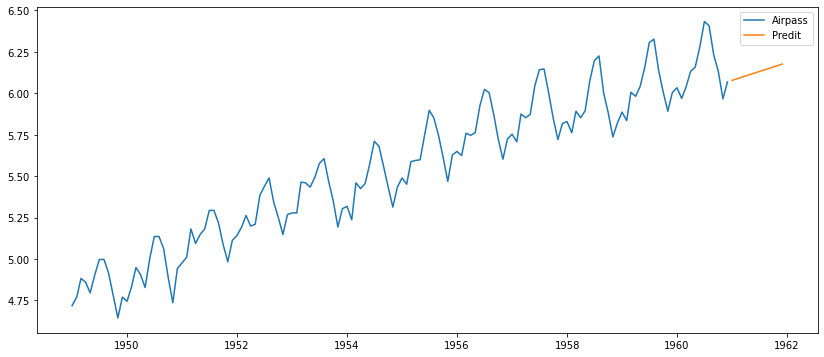

In [18]:
led = ExponentialSmoothing(np.asarray(y['Airpass']), trend='mul', seasonal=None).fit()
led_pred = led.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(y['Airpass'], label='Airpass')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), led_pred, label='Predit')
plt.legend()
plt.show()

Et enfin pour la méthode de Holt-Winters :

/Users/anislours/Desktop/workspace/venv/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


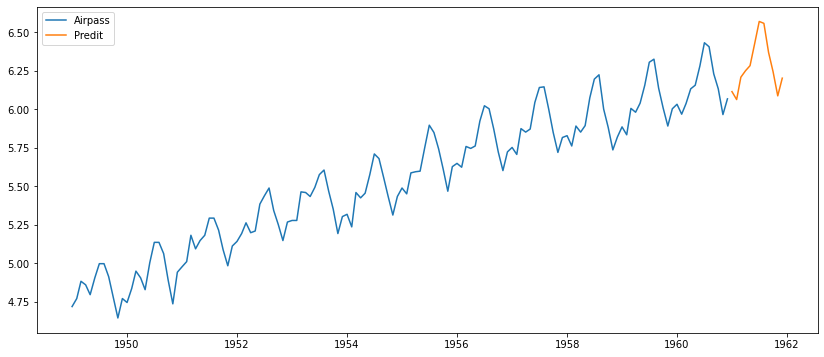

In [19]:
hw = ExponentialSmoothing(np.asarray(y['Airpass']), seasonal_periods=12, trend='mul', seasonal='mul').fit()
hw_pred = hw.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(y['Airpass'], label='Airpass')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), hw_pred, label='Predit')
plt.legend()
plt.show()

# 5. TP : Prévoyez une série temporelle à l’aide des méthodes SARIMA

#### Stationnarisation de la série

On désigne par $X_{t}$  la série airpass, et on considère $Y_{t}=ln(X_{t})$ . On travaille en effet sur le logarithme de la série afin de pallier l’accroissement de la saisonnalité. On passe ainsi d’un modèle multiplicatif à un modèle additif.

/Users/anislours/Desktop/workspace/venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Users/anislours/Desktop/workspace/venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


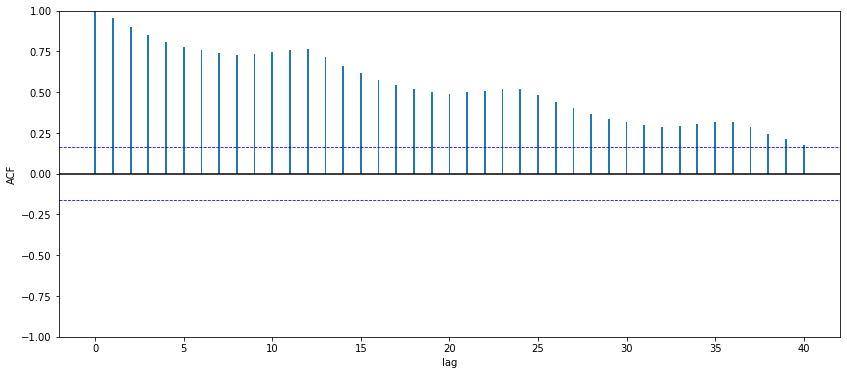

In [20]:
from statsmodels.tsa.stattools import acf, pacf
from functions import plot_sortie_acf

y_len = len(y['Airpass']) # variable nécessaire pour l'utilisation de plot_sortie_acf

plot_sortie_acf(acf(np.asarray(y['Airpass'])), y_len)

La sortie ACF présente une décroissance lente vers 0, ce qui traduit un problème de non-stationnarité. On effectue donc une différenciation $(I−B)$ .

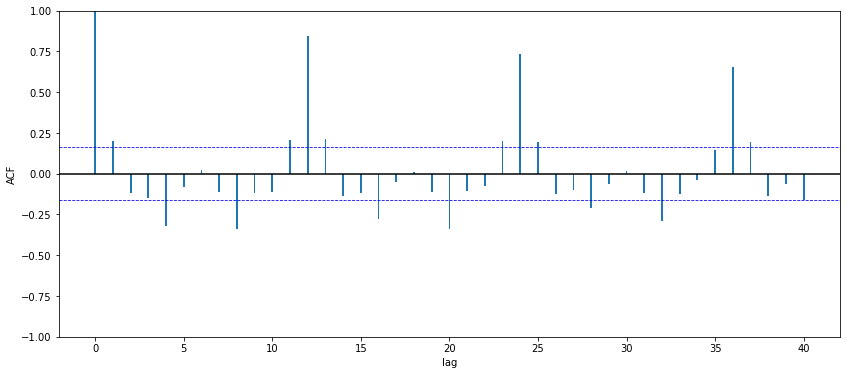

In [21]:
y_dif1 = y['Airpass'] - y['Airpass'].shift(1)

plot_sortie_acf(acf(np.asarray(y_dif1[1:])), y_len)

La sortie ACF de la série ainsi différenciée présente encore une décroissance lente vers 0 pour les multiples de 12. On effectue cette fois la différenciation $(I−B^{12})$ .

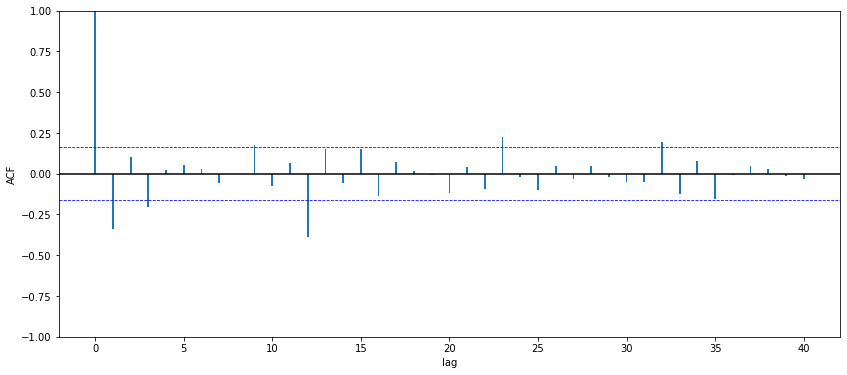

In [22]:
y_dif_1_12 = y_dif1 - y_dif1.shift(12)

plot_sortie_acf(acf(np.asarray(y_dif_1_12[13:])), y_len)

#### Identification, estimation et validation de modèles

On s’appuie sur les autocorrélogrammes simple et partiels estimés :

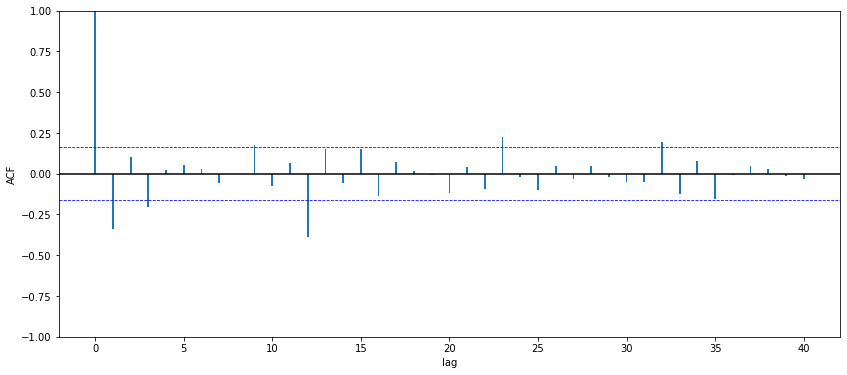

In [23]:
y_dif_1_12 = y_dif1 - y_dif1.shift(12)

plot_sortie_acf(acf(np.asarray(y_dif_1_12[13:])), y_len)

/Users/anislours/Desktop/workspace/venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1016: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


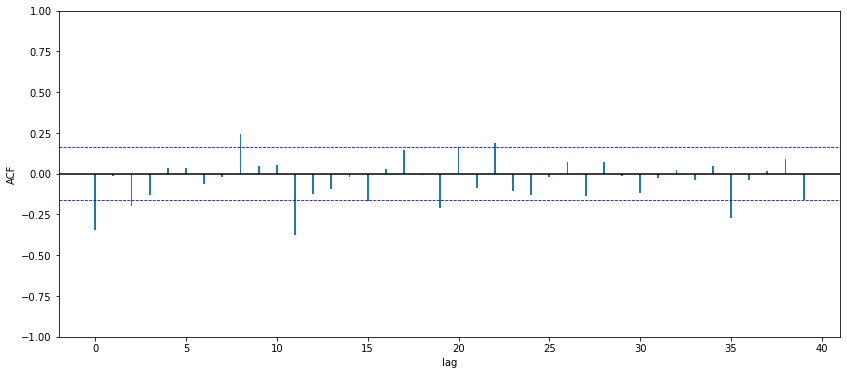

In [24]:
plot_sortie_acf(pacf(np.asarray(y_dif_1_12[13:])), y_len, pacf=True)

#### Modèle 1

On estime en premier lieu un modèle $SARIMA(1,1,1)(1,1,1)_{12}$ au vu des autocorrélogrammes empiriques simples et partiels. Ce modèle s’écrit :

$$(I−φ_{1}B)(I−φ′_{1}B^{12})(I−B)(I−B^{12})ln(X_{t})=(I+θ_{1}B)(I+θ′_{1}B^{12})ε_{t} $$

In [25]:
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox

model1 = SARIMAX(np.asarray(y['Airpass']), order=(1,1,1), seasonal_order=(1,1,1,12))
results1 = model1.fit()
print(results1.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results1.resid, lags=elt)[1].mean()))

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 245.152
Date:                            Thu, 24 Sep 2020   AIC                           -480.304
Time:                                    01:32:14   BIC                           -465.928
Sample:                                         0   HQIC                          -474.462
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1704      0.212      0.802      0.422      -0.246       0.587
ma.L1         -0.5650      0.184   

/Users/anislours/Desktop/workspace/venv/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


Ce modèle ayant des paramètres non significatifs, on en teste un second.

#### Modèle 2

Soit le modèle :
$$ (I−φ′_{1}B^{12})(I−B)(I−B^{12})ln(X_{t})=(I+θ_{1}B)(I+θ′_{1}B^{12})ε_{t} $$

In [26]:
model2 = SARIMAX(np.asarray(y['Airpass']), order=(1,1,1), seasonal_order=(0,1,1,12))
results2 = model2.fit()
print(results2.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results2.resid, lags=elt)[1].mean()))

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 244.945
Date:                            Thu, 24 Sep 2020   AIC                           -481.890
Time:                                    01:32:14   BIC                           -470.389
Sample:                                         0   HQIC                          -477.217
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1841      0.201      0.915      0.360      -0.210       0.578
ma.L1         -0.5667      0.174   

/Users/anislours/Desktop/workspace/venv/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


Ce modèle ayant des paramètres non significatifs, on en teste un troisième.

#### Modèle 3

Soit le modèle :
$$ (I−B)(I−B^{12})ln(X_{t})=(I+θ_{1}B)(I+θ′_{1}B^{12})ε_{t}$$

In [27]:
model3 = SARIMAX(np.asarray(y['Airpass']), order=(0,1,1), seasonal_order=(0,1,1,12))
results3 = model3.fit()
print(results3.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results3.resid, lags=elt)[1].mean()))

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 244.696
Date:                            Thu, 24 Sep 2020   AIC                           -483.393
Time:                                    01:32:15   BIC                           -474.767
Sample:                                         0   HQIC                          -479.888
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4013      0.073     -5.496      0.000      -0.544      -0.258
ma.S.L12      -0.5566      0.096   

/Users/anislours/Desktop/workspace/venv/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


Les tests de significativité des paramètres et de blancheur du résidu sont validés au niveau 5%.

In [28]:
from scipy.stats import shapiro

shapiro(results3.resid)

ShapiroResult(statistic=0.168989896774292, pvalue=5.187279620911401e-25)

Le test de normalité est également validé pour ce modèle.

#### Prévision à l’aide du modèle retenu (3) de l’année 1961

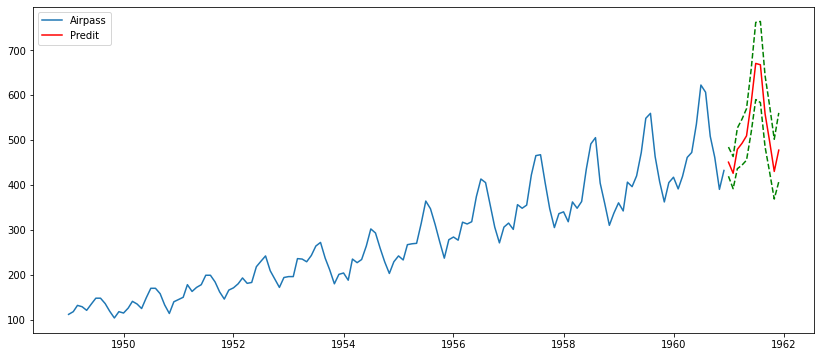

In [29]:
pred_model3 = results3.get_forecast(12)
pred = np.exp(pred_model3.predicted_mean)
pred_l = [np.exp(elt[0]) for elt in pred_model3.conf_int(alpha=0.05)]
pred_u = [np.exp(elt[1]) for elt in pred_model3.conf_int(alpha=0.05)]

plt.figure(figsize=(14,6))
plt.plot(x['Airpass'], label='Airpass')
plt.plot(pd.date_range(x.index[len(x)-1], periods=12, freq='M'), pred, color='r', label='Predit')
plt.plot(pd.date_range(x.index[len(x)-1], periods=12, freq='M'), pred_l, color='g', linestyle='--')
plt.plot(pd.date_range(x.index[len(x)-1], periods=12, freq='M'), pred_u, color='g', linestyle='--')
plt.legend()
plt.show()

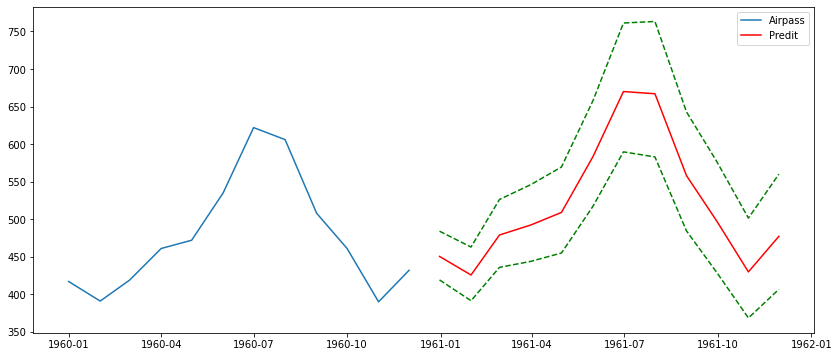

In [30]:
plt.figure(figsize=(14,6))
plt.plot(x['Airpass']['1960':], label='Airpass')
plt.plot(pd.date_range(x.index[len(x)-1], periods=12, freq='M'), pred, color='r', label='Predit')
plt.plot(pd.date_range(x.index[len(x)-1], periods=12, freq='M'), pred_l, color='g', linestyle='--')
plt.plot(pd.date_range(x.index[len(x)-1], periods=12, freq='M'), pred_u, color='g', linestyle='--')
plt.legend()
plt.show()

#### Analyse a posteriori

On tronque la série de l’année 1960, qu’on cherche ensuite à prévoir à partir de l’historique 1949-1959.

In [31]:
x_tronc = x[:'1959']
y_tronc = np.log(x_tronc)
x_a_prevoir = x['1960':]

On vérifie que le modèle 3 sur la série tronquée est toujours validé.

In [32]:
model3tronc = SARIMAX(np.asarray(y_tronc['Airpass']), order=(0,1,1), seasonal_order=(0,1,1,12))
results3tronc = model3tronc.fit()
print(results3tronc.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results3tronc.resid, lags=elt)[1].mean()))
    
shapiro(results3tronc.resid)

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 223.627
Date:                            Thu, 24 Sep 2020   AIC                           -441.253
Time:                                    01:32:17   BIC                           -432.916
Sample:                                         0   HQIC                          -437.868
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3488      0.081     -4.303      0.000      -0.508      -0.190
ma.S.L12      -0.5621      0.094   

/Users/anislours/Desktop/workspace/venv/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.17491108179092407, pvalue=5.485673259451783e-24)

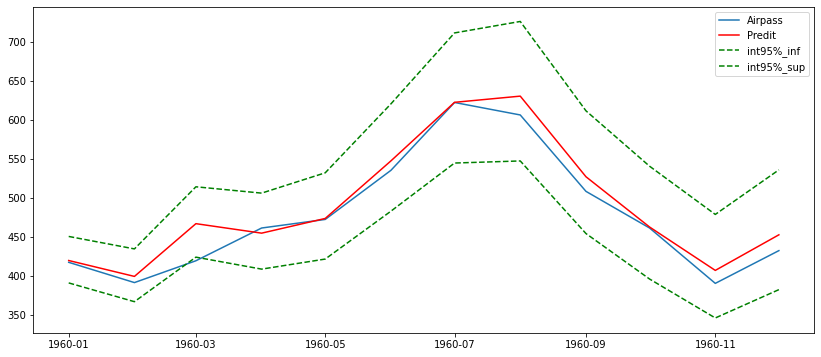

In [33]:
pred_model3tronc = results3tronc.get_forecast(12)
pred_tronc = np.exp(pred_model3tronc.predicted_mean)
pred_l_tronc = [np.exp(elt[0]) for elt in pred_model3tronc.conf_int(alpha=0.05)]
pred_u_tronc = [np.exp(elt[1]) for elt in pred_model3tronc.conf_int(alpha=0.05)]

plt.figure(figsize=(14,6))
plt.plot(x_a_prevoir, label='Airpass')
plt.plot(x_a_prevoir.index, pred_tronc, color='r', label='Predit')
plt.plot(x_a_prevoir.index, pred_l_tronc, color='g', linestyle='--', label='int95%_inf')
plt.plot(x_a_prevoir.index, pred_u_tronc, color='g', linestyle='--', label='int95%_sup')
plt.legend()
plt.show()

On calcule les RMSE et MAPE.

In [34]:
rmse = np.sqrt(((x_a_prevoir['Airpass']-pred_tronc)**2).mean())
rmse

18.59230984670951

In [35]:
mape=(np.abs(1-pred_tronc/x_a_prevoir['Airpass'])).mean()*100
mape

2.90416326714094